In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

Data collection and Analysis

In [3]:
df = pd.read_csv("insurance.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Catagory Features:
1. Age
2. Smoker
3. Region

C:\Users\fpb2527.022.subhayan\AppData\Local\Temp\ipykernel_25996\4118264155.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


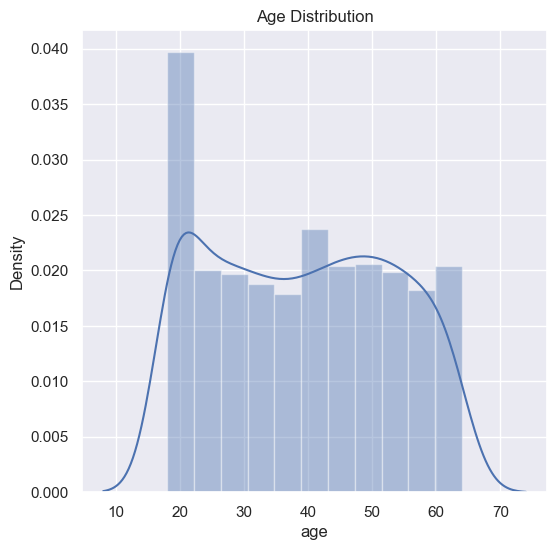

In [16]:
# Distribution of Age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

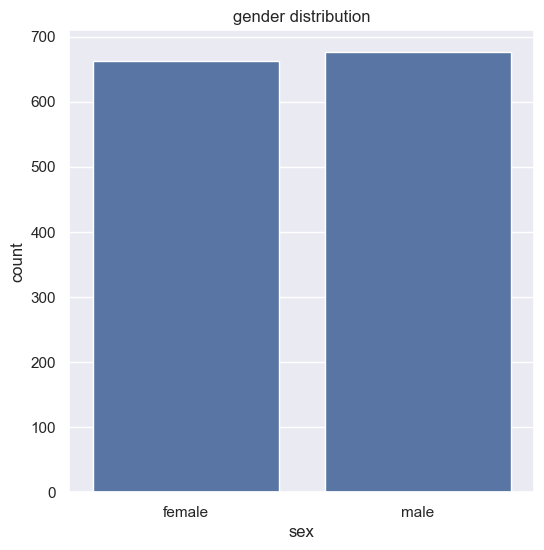

In [17]:
# Gender Column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=df)
plt.title('gender distribution')
plt.show()

In [15]:
# Another way to calculate the number of gender

df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

C:\Users\fpb2527.022.subhayan\AppData\Local\Temp\ipykernel_25996\2366825558.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


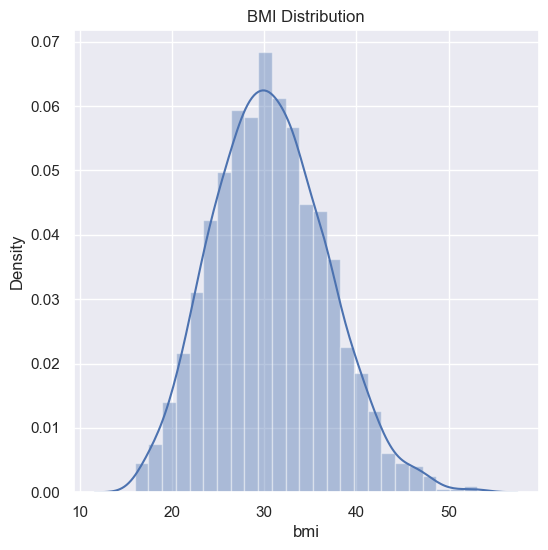

In [18]:
# BMI Distribution
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

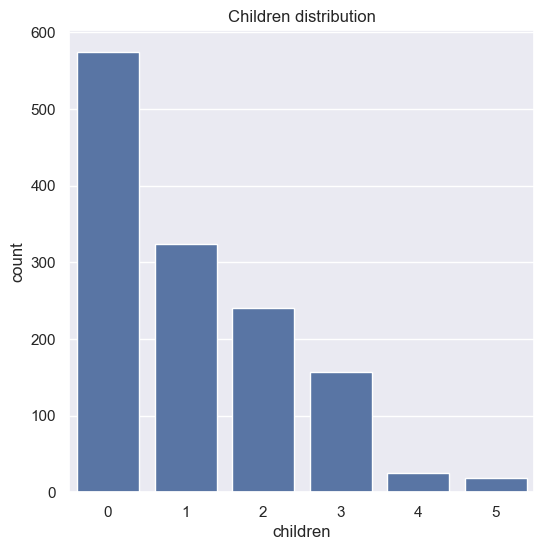

In [19]:
# Children Column

plt.figure(figsize=(6,6))
sns.countplot(x='children', data=df)
plt.title('Children distribution')
plt.show()

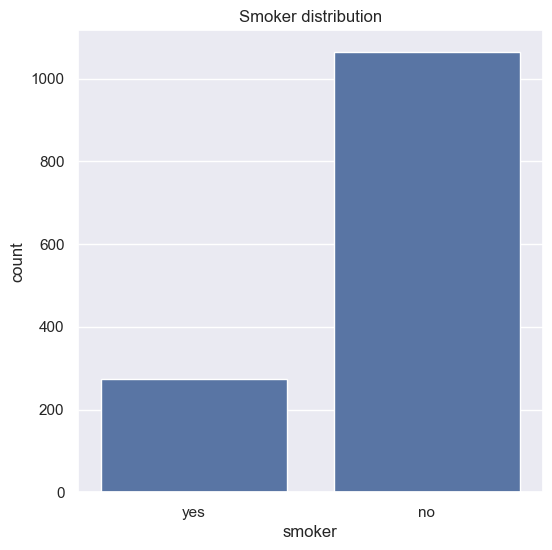

In [21]:
# Smoker Column

plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=df)
plt.title('Smoker distribution')
plt.show()

In [22]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

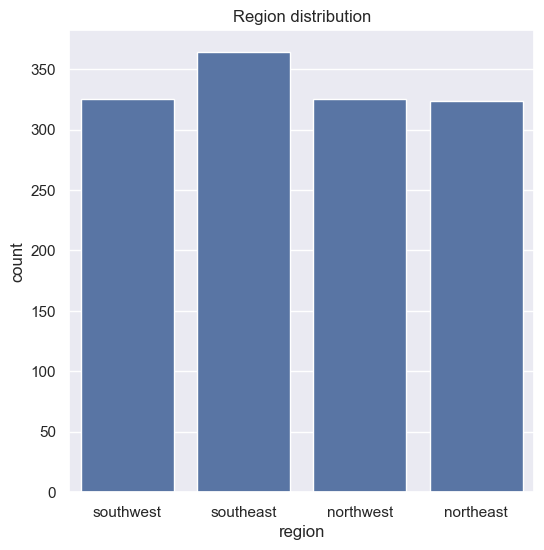

In [23]:
# Region Column

plt.figure(figsize=(6,6))
sns.countplot(x='region', data=df)
plt.title('Region distribution')
plt.show()

In [24]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

C:\Users\fpb2527.022.subhayan\AppData\Local\Temp\ipykernel_25996\3505777530.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'])


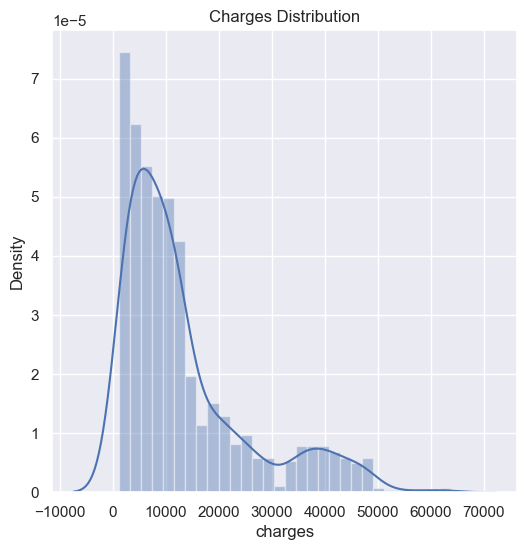

In [27]:
# Distribution of Charges
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('Charges Distribution')
plt.show()

Data Processing

In [29]:
print(df.sex.value_counts())
print(df.children.value_counts())
print(df.smoker.value_counts())
print(df.region.value_counts())

sex
male      676
female    662
Name: count, dtype: int64
children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


In [33]:
df.replace({'sex':{'male':0, 'female':1}}, inplace = True)
df.replace({'smoker':{'yes':0, 'no':1}}, inplace = True)
df.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace = True)

In [34]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


Splitting the Dataset

In [37]:
x = df.drop(columns='charges', axis=1)
y = df['charges']

In [38]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       1
1      18    0  33.770         1       0       0
2      28    0  33.000         3       0       0
3      33    0  22.705         0       0       2
4      32    0  28.880         0       0       2
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       2
1334   18    1  31.920         0       0       3
1335   18    1  36.850         0       0       0
1336   21    1  25.800         0       0       1
1337   61    1  29.070         0       1       2

[1338 rows x 6 columns]


In [39]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting the Training and testing Data

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

Model Training

Linear Regression

In [53]:
lm = LinearRegression()

In [54]:
lm.fit(x_train, y_train)

LinearRegression()

Model Evaluation

In [55]:
# Prediction on Training Data

y_pred = lm.predict(x_test)

In [56]:
y_pred

array([ 1820.75621886, 11893.35566097, 10391.48426582,  2131.62301167,
        8175.83419518, 11016.30531453,  3352.18872713,  1013.79352548,
       12023.09477086,  9453.8581105 , 11467.3225898 ,  4817.664947  ,
       29808.20461479,  -513.75717634, 12754.46439804, 13119.43189556,
        4118.83414354,  7731.48626043, 29297.74067135,  2699.14570484,
       12329.22054394,  2214.5652979 , 34452.34192694, 32066.24540146,
       30224.63592129,  8944.2429203 ,  2230.70212755, 15188.75659902,
        6532.69778856,  1906.71098074,  9402.89455638,  5634.95908593,
        4371.49314151,  4823.49011099,  9453.52337493,  4528.76526399,
       29818.9763023 ,  6751.3046149 , 27557.85321987, 13878.30367427,
         117.41861964, 28385.96859962,  7697.94328125,  1430.2691451 ,
       10187.26558274,  7986.59837739, 11431.85182879,  8096.73882633,
       10698.62941741, 13781.02808991,  6083.58400067,  -813.98261125,
       26175.82891349, 37020.38968178,  7319.63150011, 17878.3155211 ,
      

R_2 Value

In [61]:
r2_train = metrics.r2_score(y_test, y_pred)
print('R squared value: ', r2_train)

R squared value:  0.7454471618659975


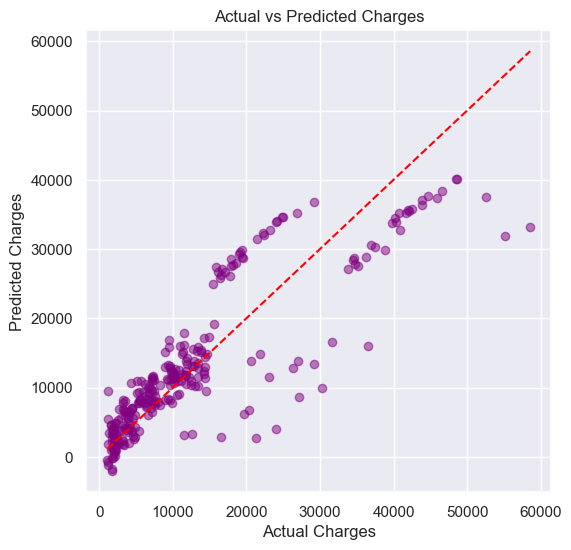

In [69]:
# 3. Visualization

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.show()

Building a Predictive System

In [71]:
input_data = (60,1,24.53,0,1,0)

#Changing input_data into numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = lm.predict(input_data_reshaped)
print(prediction)

[34435.91461219]


C:\Users\fpb2527.022.subhayan\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


2. Random Forest Regression

In [63]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [64]:
# 2. Model Evaluation
rf_test_pred = rf_model.predict(x_test)

In [65]:
# Calculating Metrics

rf_r2 = metrics.r2_score(y_test, rf_test_pred)
rf_mae = metrics.mean_absolute_error(y_test, rf_test_pred)

In [66]:
print(f"Random Forest R-squared: {rf_r2}")
print(f"Random Forest MAE: {rf_mae}")

Random Forest R-squared: 0.8353635773587457
Random Forest MAE: 2742.7626726118665


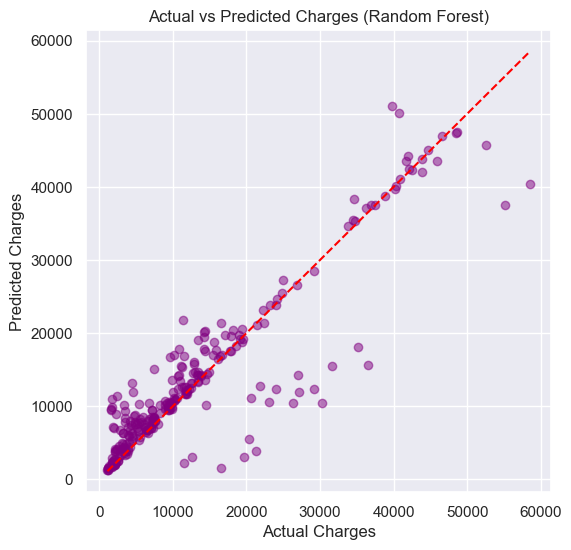

In [67]:
# 3. Visualization

plt.figure(figsize=(6, 6))
plt.scatter(y_test, rf_test_pred, alpha=0.5, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges (Random Forest)')
plt.show()

Building predictive System

In [72]:
input_data = (60,1,24.53,0,1,0)

#Changing input_data into numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rf_model.predict(input_data_reshaped)
print(prediction)

[25710.296406]


C:\Users\fpb2527.022.subhayan\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
